In [1]:
# Import lbraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from sklearn.metrics import r2_score
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError

In [2]:
# Read csv file and transform it into a DataFrame
data = pd.read_csv('final.csv')
data = data.replace(' -', 0)
data.head()

,Unnamed: 0,%_of_homeoffice,Cantidad de Conexiones de internet fijas,Numero de empresas sin ventas,Cantidad de trabajadores en empresas sin ventas,Numero de empresas Micro 1,Cantidad de trabajadores en empresas Micro 1,Numero de empresas Pequeña 1,Cantidad de trabajadores en empresas Pequeña 1,Numero de empresas Mediana 1,Cantidad de trabajadores en empresas Mediana 1,Numero de empresas Grande 1,Cantidad de trabajadores en empresas Grande 1,Consumo de Electricidad en Servicios Comunitarios en M$,Consumo de Electricidad en M$,Consumo de Electricidad Dependencias Municipales en M$,Empresas informaticas,Empresas no informaticas,Trabajadores en empresas informaticas,Trabajadores en empresas no informaticas
0,Las Condes,61.260607,123359.0,13507.0,15727.0,11934.0,2533.0,6200.0,17716.0,2102.0,44293.0,980.0,68487.0,1608421.0,375540.0,1232881.0,32101.0,33332.0,368675.0,651272.0
1,Santiago,58.401903,171687.0,15587.0,207904.0,16220.0,59506.0,5769.0,26065.0,1449.0,52774.0,424.0,54314.0,3035099.0,420817.0,2614282.0,23551.0,47660.0,367621.0,711310.0
2,El Monte,59.689753,5635.0,306.0,804.0,491.0,1478.0,121.0,386.0,15.0,593.0,3.0,125.0,227620.0,227620.0,0.0,221.0,1466.0,192.0,5683.0
3,Estación Central,59.541304,52799.0,1410.0,1737.0,2130.0,358.0,595.0,3050.0,118.0,6091.0,43.0,12435.0,1807185.0,68539.0,1738646.0,1640.0,6324.0,10333.0,61895.0
4,Recoleta,60.146239,39371.0,2102.0,2038.0,3161.0,503.0,1095.0,4811.0,353.0,8464.0,99.0,5706.0,602111.0,183891.0,417268.0,2891.0,10288.0,25591.0,52594.0


In [3]:
# Separate data in X's and y
x_data, y_data = data.drop(["%_of_homeoffice", "Unnamed: 0"], axis=1), data["%_of_homeoffice"]

x_data = np.asarray(x_data).astype(np.float32)
y_data = np.asarray(y_data).astype(np.float32)

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=42, test_size=0.1, shuffle=True)

In [4]:
learning_rate = 0.001

# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(160, activation='relu'),
    Dropout(0.2),
    Dense(480, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dense(1, activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [5]:
# loss function
mse = MeanSquaredError()
rmse = RootMeanSquaredError()
mae = MeanAbsoluteError()

model.compile(
    loss=mse, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[mse, rmse, mae]
)

In [6]:
# train the model
history = model.fit(
    x_train, 
    y_train, 
    epochs=20, 
    batch_size=64,
    validation_split=0.1
)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 1907783552.0000 - mean_squared_error: 1907783552.0000 - root_mean_squared_error: 43678.1797 - mean_absolute_error: 24360.4941 - val_loss: 98717200.0000 - val_mean_squared_error: 98717200.0000 - val_root_mean_squared_error: 9935.6523 - val_mean_absolute_error: 8024.7812
Epoch 2/20
1/1 [==============================] - 0s 33ms/step - loss: 8215611392.0000 - mean_squared_error: 8215611392.0000 - root_mean_squared_error: 90640.0078 - mean_absolute_error: 35439.3828 - val_loss: 2213835264.0000 - val_mean_squared_error: 2213835264.0000 - val_root_mean_squared_error: 47051.4102 - val_mean_absolute_error: 37360.5195
Epoch 3/20
1/1 [==============================] - 0s 34ms/step - loss: 6670746624.0000 - mean_squared_error: 6670746624.0000 - root_mean_squared_error: 81674.6406 - mean_absolute_error: 62897.4141 - val_loss: 708656512.0000 - val_mean_squared_error: 708656512.0000 - val_root_mean_squared_error: 26620.6035 - val_m

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               3040      
_________________________________________________________________
dropout (Dropout)            (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               77280     
_________________________________________________________________
dropout_1 (Dropout)          (None, 480)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               123136    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 203,713
Trainable params: 203,713
Non-trainable params: 0
__________________________________________________

In [8]:
# Function to plot the metrics
def plot_history(history, key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key, 'val_'+key])
    plt.show()

#### Plot the Mean Squared Error

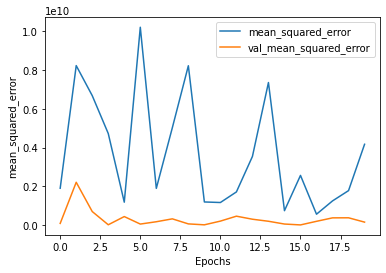

In [9]:
plot_history(history, 'mean_squared_error')

#### Plot the Root Mean Squared Error

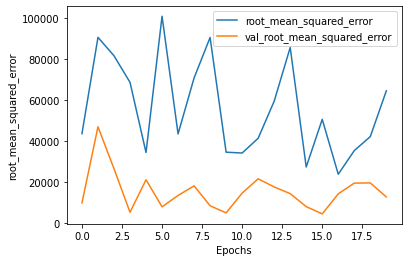

In [10]:
plot_history(history, 'root_mean_squared_error')

#### Plot the Root Mean Absolute Error

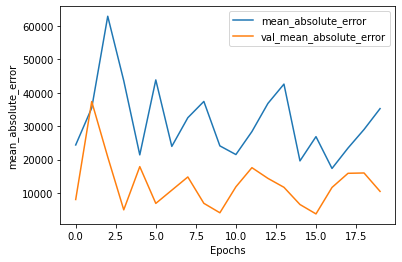

In [11]:
plot_history(history, 'mean_absolute_error')

#### Model Rsquared score

In [12]:
y_pred = model.predict(x_test) 

r2 = r2_score(y_test, y_pred)
r2

-660986423.0481906

#### Show Evaluation

In [13]:
Mse = mse(y_test, y_pred).numpy()
Rmse = rmse(y_test, y_pred).numpy()
Mae = mae(y_test, y_pred).numpy()

print(f"RMSE: {Rmse}")
print(f"MSE: {Mse}")
print(f"MAE: {Mae}")
print(f"r2: {r2}")

RMSE: 30622.205078125
MSE: 1582216320.0
MAE: 25411.759765625
r2: -660986423.0481906
